In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import control as ctrl
import matplotlib.pyplot as plt
import vibrationtesting as vt
import numpy as np
import scipy as sp

In [54]:
M = np.diag([1,1,1])

K_tuned = np.array([[3., -1, -1],[-1, 3, -1],[-1, -1, 3]])
K = np.array([[3.03, -1, -1],[-1, 2.98, -1],[-1, -1, 3]])
K

Damping = K*.01
Cd = np.eye(3)
Cv = Ca = np.zeros_like(Cd)
Bt = np.eye(3)

omega, H = vt.sos_frf(M, Damping, K, Bt, Cd, Cv, Ca, .0, 3, 1, 1)

vt.frfplot(omega, H)

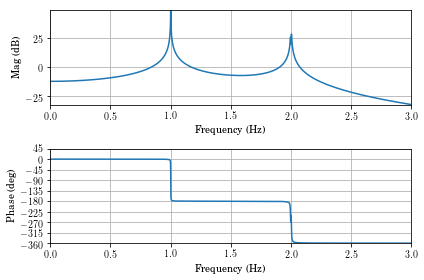

In [304]:
H_all = np.zeros((3,3000,3), dtype = 'complex128')
for i in np.arange(1, 4):
    for j in np.arange(1, 4):
        omega, H_all[i-1,:,j-1] = vt.sos_frf(M, Damping/10, K, Bt, Cd, Cv, Ca, 0, 3, i, j, num_freqs = 3000)
vt.frfplot(omega,H_all[1,:,0])    

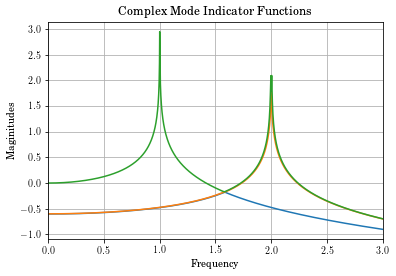

In [305]:
vt.cmif(omega, H_all)

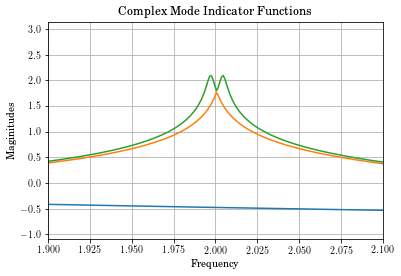

In [306]:
vt.cmif(omega, H_all, freq_min = 1.9, freq_max = 2.1)